# Armlist



We have worked with K2 on an updated contract and moving forward they will be cleaning, deduplicating and sharing data with us on a quarterly basis. As of July 2020, we have data from January 2019 through June 2020.

Since all files are huge and it can't be opened in the Excel file, I will open it using Python for Data Cleaning.

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import itertools
import collections

import nltk
from nltk.corpus import stopwords

import networkx

import re, string

pd.set_option('display.max_columns', 500)

In [2]:
# 2018 Data

q1_2018 = pd.read_csv("Quarterly Files/2018Q1.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)
q2_2018 = pd.read_csv("Quarterly Files/2018Q2.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)
q3_2018 = pd.read_csv("Quarterly Files/2018Q3.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)
q4_2018 = pd.read_csv("Quarterly Files/2018Q4.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 107331: expected 82 fields, saw 93\n'
b'Skipping line 453688: expected 82 fields, saw 93\n'
b'Skipping line 488460: expected 82 fields, saw 93\n'
b'Skipping line 519666: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 640513: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (53,54,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 97231: expected 82 fields, saw 93\n'
b'Skipping line 513934: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:31

In [3]:
q1_2019 = pd.read_csv("Quarterly Files/2019Q1.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 45044: expected 82 fields, saw 93\n'
b'Skipping line 267975: expected 82 fields, saw 93\n'
b'Skipping line 336121: expected 82 fields, saw 93\n'
b'Skipping line 504972: expected 82 fields, saw 93\n'
b'Skipping line 739790: expected 82 fields, saw 93\n'


## An error occurring during load up the file.
While I was opening up the folder, some rows have multiple separators (|) issues. For example, we want 82 columns, so each row should have 82 separators yet, these rows have more than 82 separators, so the computer could not recognize it as a row. This error is present in all data files, but these rows are less than 6 per file (q1 2019 files has over 800,000 rows).  Therefore, I decided to eliminate these errored rows.

In [4]:
q1_2019.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
0,510392,NaN,9219754,2019-01-05,For Sale: Norinco sks,Rifles,Rifle,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Norinco,7.62x39,2012-10-19,450.0,Private Party,This is the shorter paratrooper may trade i ha...,Hickory,North Carolina,NC,35.758221,-81.308228,35.200436,-79.819618,35.758221,-81.308228,2019-01-05 16:02:46.513000000,http://www.armslist.com/posts/9219754,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111111111111,NaN,0
1,590251,NaN,9368604,2019-01-05,For Sale: Spikes Tactical AR Build,Rifles,Rifle,Floyd,"Clarksville, New Albany, Indiana",NaN,Spikes Tactical,223/5.56 NATO,2017-10-21,800.0,Private Party,Spikes Tactical AR built with all Spikes parts...,New Albany,Indiana,IN,38.293354,-85.837914,39.819489,-86.372078,38.293354,-85.837914,2019-01-05 16:02:49.030000000,http://www.armslist.com/posts/9368604,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,tactical,tactical,NaN,NaN,N,0,0,1,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,0
2,555690,NaN,9153770,2019-01-05,For Sale: Smith and Wesson 1917 revolver - 19...,Handguns,Revolver,Dauphin,"Mechanicsburg, Harrisburg, Pennsylvania",Double / Single Action,Smith & Wesson,45 ACP,2015-12-24,650.0,Private Party,Old workhorse of a revolver. Shoots great with...,Harrisburg,Pennsylvania,PA,40.264587,-76.869644,40.967995,-77.609558,40.264587,-76.869644,2019-01-05 16:02:49.607000000,http://www.armslist.com/posts/9153770,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111111111111,NaN,0
3,395218,NaN,8809152,2019-01-05,For Sale: M44,Rifles,Rifle,Maricopa,"Scottsdale, Phoenix, Arizona",NaN,NaN,NaN,2018-07-30,350.0,Private Party,This is a Hungarian mosin nagant m44 built in ...,Scottsdale,Arizona,AZ,33.524143,-111.874240,34.162819,-111.919330,33.524143,-111.874240,2019-01-05 16:02:51.140000000,http://www.armslist.com/posts/8809152,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11111111111111,NaN,0
4,510392,NaN,9067737,2019-01-05,For Sale: Savage springfield 12,Shotguns,Shotgun,Catawba,"Lincoln, Hickory / Lenoir, North Carolina",Semi-Automatic,Savage Arms,12 Gauge,2012-10-19,325.0,Private Party,Semi auto functions perfect older gun 6

In [5]:
q1_2019.tail()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
821544,1529307,NaN,9493765,2019-01-30,For Sale: Smith & Wesson 19-7 .357mag with a ...,Handguns,Pistol,Wyandotte,"Linn Valley, Kansas City, Kansas",Single Action,Smith & Wesson,357 Magnum,2019-01-30,530.0,Private Party,"SHIPPING 3rd day delivery PAYMENTmoney Oder,vi...",Kansas City,Kansas,KS,39.136353,-94.615982,38.498856,-98.325623,39.136353,-94.615982,2020-02-03 00:14:01.307000000,http://www.armslist.com/posts/9493765,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,0
821545,1634003,NaN,9493792,2019-01-30,For Sale: Montana Rifle 1999 ALR-SS,Rifles,Rifle,Undetermined,"Missouri, Missouri, United States",NaN,NaN,300 Winchester Magnum,2019-01-21,1000.0,Private Party,New in Box (NIB) Montana Rifle Company Model 1...,Missouri,Missouri,MO,NaN,NaN,38.310318,-92.421555,38.310318,-92.421555,2020-02-03 00:14:02.780000000,http://www.armslist.com/posts/9493792,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,1
821546,1457874,NaN,9493806,2019-01-30,For Sale: custom AR,Rifles,Rifle,Richland,"Irmo, Columbia, South Carolina",NaN,NaN,223/5.56 NATO,2019-01-30,800.0,Private Party,"cmc trigger, odin works upper, boron bolt and ...",Columbia,South Carolina,SC,33.987453,-81.024864,33.639748,-80.855362,33.987453,-81.024864,2020-02-03 00:14:04.300000000,http://www.armslist.com/posts/9493806,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,1
821547,1567040,NaN,9493867,2019-01-30,For Sale: RUGER SUPER BLACKHAWK - 44 MAGNUM,Handguns,Revolver,Taylor,"rib lake, Northern WI, Wisconsin",Single Action,Ruger,44 Magnum,2011-06-08,1250.0,Private Party,RUGER SUPER BLACKHAWK in 44 magnum. N.I.B. yes...,rib lake,Wisconsin,WI,45.208012,-90.168991,44.676918,-89.864044,45.208012,-90.168991,2020-02-03 00:14:07.023000000,http://www.armslist.com/posts/9493867,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11111111111111,NaN,0
821548,1675790,NaN,9493878,2019-01-30,For Sale: savage model 10 fsp-sr,Rifles,Rifle,Allen,"North East, Fort Wayne, Indiana",Bolt Action,Savage Arms,308 Winchester,2013-11-11,1000.0,Private Party,Gun has less than 

In [6]:
q1_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821549 entries, 0 to 821548
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   uid                          821549 non-null  int64  
 1   store_id                     17799 non-null   float64
 2   post_id                      821549 non-null  int64  
 3   listed_date                  821549 non-null  object 
 4   title                        821549 non-null  object 
 5   category                     821549 non-null  object 
 6   firearm_type                 821549 non-null  object 
 7   County                       820732 non-null  object 
 8   location                     821549 non-null  object 
 9   action                       518347 non-null  object 
 10  manufacturer                 517174 non-null  object 
 11  caliber                      542343 non-null  object 
 12  registered_date              712441 non-null  object 
 13 

In [7]:
q1_2019.columns

Index(['uid', 'store_id', 'post_id', 'listed_date', 'title', 'category',
       'firearm_type', 'County', 'location', 'action', 'manufacturer',
       'caliber', 'registered_date', 'price_num', 'sale_type', 'post_content',
       'City', 'State', 'State_id', 'city_lat', 'city_lng', 'state_lat',
       'state_lng', 'final_lat', 'final_lng', 'extract_date', 'post_url',
       'firearm_accessories', 'sale_buy', 'uid_Change', 'store_id_Change',
       'category_Change', 'firearm_type_Change', 'action_Change',
       'manufacturer_Change', 'caliber_Change', 'registered_date_Change',
       'sale_type_Change', 'listed_date_Change', 'location_Change',
       'price_num_Change', 'post_content_Change', 'title_Change',
       'Model_Title_Cnt', 'Model_Content_Cnt', 'Feature_Title_Cnt',
       'Feature_Content_Cnt', 'Exclude_Title_Cnt', 'Exclude_Content_Cnt',
       'Model_Title', 'Model_Content', 'Feature_Title', 'Feature_Content',
       'Exclude_Title', 'Exclude_Content', 'action_exclusion',
 

## Column filter out
On June 4 th, Kelly asked me to clean these files with below columns only. 

Field | Field Source | Description
-- | -- | --
uid | K2 | Distinct User Id   developed by K2 through review of collection of other items for sale by the   same seller.
store_id | ArmsList | ID number assigned by   Armslist to dealers registered on the website.
post_id | ArmsList | Armslist Post ID   number contained in posting URL.
listed_date | ArmsList | Content of   "Listed on" field of Post.
category | K2/Armslist | Content of Category   field of Post; when not available, derived if possible by K2 from   firearm_type field.
firearm_type | ArmsList | Content of Firearm   Type field of Post.
County | K2 | County of Post   derived by K2 by parsing the location field.    Approximate.
action | ArmsList | Content of Action   field of Post.
manufacturer | ArmsList | Content of   Manufacturer field of Post.
caliber | ArmsList | Content of Caliber   field of Post.
price_num | K2 | Content of Price   field of Post.
sale_type | ArmsList | Content of Seller   Type field of Post.
post_content | ArmsList | Content of Post body field.
City | K2 | City of Post derived   by K2 by parsing the location field. Approximate.
State | K2 | State of Post derived   by K2 by parsing the location field.
State_id | K2 | State ISO derived by   K2 by parsing the location field.
final_lat | K2 | City latitude derived   by K2 if available, otherwise state latitude derived by K2.
final_lng | K2 | City longitude   derived by K2 if available, otherwise state longitude derived by K2.
firearm_accessories | ArmsList | Content of the   firearm_type field for Categories of Firearm or Accessory.
sale_buy | K2/Armslist | Field is derived from   the Title section of the Post.  Ex.   'For Sale/Trade:'
UniquePostIdFlag | K2 | Indicates   if the post is the "Master" post (1 = Yes, 0 = No)
RecordCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of records in the dataset for a given post id.
DupeRemoveFlag | K2 | This   field has been replaced by the dup_filter_group field.
uid_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "uid" , in the dataset, for a given post   id.
store_id_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "store_id" , in the dataset, for a given   post id.
listed_date_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "listed_date" , in the dataset, for a   given post id.
title_ChangeCount | K2 | Set   on the master post only ( UniquePostIdFlag = 1 ) and indicates the total   number of changes to the "title" , in the dataset, for a given post   id.
category_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "category" , in the dataset, for a given post id.
firearm_type_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "firearm_type" , in the dataset, for a given post   id.
location_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "location" , in the dataset, for a given post id.
action_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "action" , in the dataset, for a given post id.
manufacturer_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "manufacturer" , in the dataset, for a given post   id.
caliber_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "caliber" , in the dataset, for a given post id.
registered_date_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "registered_date" , in the dataset, for a given post   id.
price_num_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "price_num" , in the dataset, for a given post id.
sale_type_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "sale_type" , in the dataset, for a given post id.
post_content_ChangeCount | K2 | Set on the   master post only ( UniquePostIdFlag = 1 ) and indicates the total number of   changes to the "post_content" , in the dataset, for a given post   id.



In [8]:
q2_2019 = pd.read_csv("Quarterly Files/2019Q2.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

q3_2019 = pd.read_csv("Quarterly Files/2019Q3.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

q4_2019 = pd.read_csv("Quarterly Files/2019Q4.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

q1_2020 = pd.read_csv("Quarterly Files/2020Q1.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)


april_2020 = pd.read_csv("Quarterly Files/2020_April.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)


May_June_2020 = pd.read_csv("Quarterly Files/20200501_thru_20200630.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)

b'Skipping line 252446: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 20936: expected 82 fields, saw 93\n'
b'Skipping line 110321: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (20,29,30,31,32,33,34,35,36,37,38,39,40,41,42,80) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 321425: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (20,21,29,30,31,32,33,34,35,36,37,38,39,40,41,42,45,46,80) have mixed types.Specify dtype option 

# Adding Q3 - 11/5/2020

In [9]:
q3_2020 = pd.read_csv("Quarterly Files/2020Q3.csv", encoding='ISO-8859-1', sep='|', error_bad_lines=False)


b'Skipping line 2004: expected 82 fields, saw 93\n'
b'Skipping line 231064: expected 82 fields, saw 93\n'
b'Skipping line 368179: expected 82 fields, saw 104\n'
b'Skipping line 641285: expected 82 fields, saw 93\n'
b'Skipping line 667593: expected 82 fields, saw 93\n'
b'Skipping line 822195: expected 82 fields, saw 93\n'
b'Skipping line 871735: expected 82 fields, saw 93\n'
b'Skipping line 900828: expected 82 fields, saw 93\n'
/Users/jasonlim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (21,29,30,31,32,33,34,35,36,37,38,39,40,41,42,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# A. EDA of Q3

Chris from K2 updated its Q3 2020 and sent an email with aggregated summary.

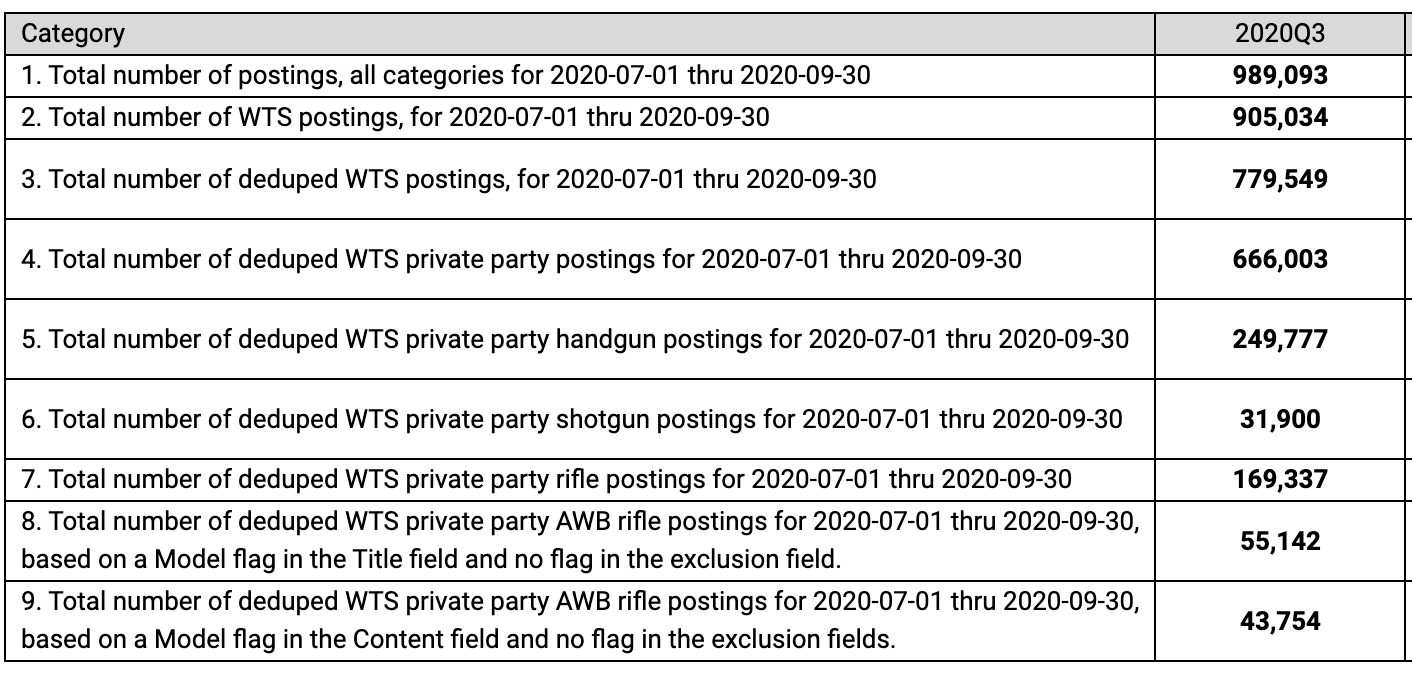

Before analysis start, we verify its results. Some rows can't be missing due to bad_lines errors, but the overall numbers should be similar.

In [10]:
q3_2020.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process
0,NaN,NaN,12041143,2020-07-01,For Sale: the,Rifles,Rifle,Undetermined,"Kentucky, Kentucky, United States",NaN,NaN,NaN,2020-07-01,NaN,Private Party,ol,Kentucky,Kentucky,KY,NaN,NaN,37.8076,-85.691490,37.807556,-85.691490,2020-07-08 16:56:26.663,http://www.armslist.com/posts/12041143,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
1,NaN,NaN,12043584,2020-07-01,For Sale: Ysus,Handguns,Handguns,Undetermined,"Florida, Florida, United States",NaN,NaN,NaN,NaN,89.0,Private Party,Ya7e,Florida,Florida,FL,NaN,NaN,27.7716,-83.772789,27.771553,-83.772789,2020-07-08 17:02:17.673,http://www.armslist.com/posts/12043584,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
2,NaN,NaN,12043673,2020-07-01,For Sale: Glock 20,Handguns,Pistol,Undetermined,"Texas, Texas, United States",Semi-Automatic,Glock,10mm,2020-07-01,350.0,Private Party,"GLOCK 20 is at a 90% good working condition, c...",Texas,Texas,TX,NaN,NaN,31.2003,-100.105090,31.200333,-100.105090,2020-07-08 17:02:23.090,http://www.armslist.com/posts/12043673,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
3,NaN,NaN,12046470,2020-07-02,For Sale: Colt Model 1908 Type III Pocket Ham...,Handguns,Pistol,Undetermined,"Georgia, Georgia, United States",NaN,Colt,380 ACP,2020-07-01,500.0,Private Party,The Colt Model 1908 Pocket Hammerless is a sem...,Georgia,Georgia,GA,NaN,NaN,32.7543,-83.188370,32.754326,-83.188370,2020-07-08 17:06:06.217,http://www.armslist.com/posts/12046470,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0
4,NaN,NaN,12051462,2020-07-03,For Sale: SMITH AND WESSON M&P 40 / EXCELLENT...,Handguns,Pistol,Undetermined,"virginia, Virginia, United States",Semi-Automatic,Smith & Wesson,40 S&W,2020-04-10,225.0,Private Party,"S&W M&P 40, 4.25"" BARREL, INCLUDES PLASTIC CAS...",virginia,Virginia,VA,NaN,NaN,37.9263,-79.436584,37.926323,-79.436584,2020-07-08 17:16:41.213,http://www.armslist.com/posts/12051462,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

In [11]:
## getting date range confirm.

print(min(q3_2020['listed_date']))
print(max(q3_2020['listed_date']))

2020-07-01
2020-09-30


In [12]:
# Q3 
# 1. Total number of postings, all categories for 2020-07-01 thru 2020-09-30

q3_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988903 entries, 0 to 988902
Data columns (total 82 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   uid                          986600 non-null  float64
 1   store_id                     5728 non-null    float64
 2   post_id                      988903 non-null  int64  
 3   listed_date                  988903 non-null  object 
 4   title                        988903 non-null  object 
 5   category                     988903 non-null  object 
 6   firearm_type                 988903 non-null  object 
 7   County                       988481 non-null  object 
 8   location                     988903 non-null  object 
 9   action                       572614 non-null  object 
 10  manufacturer                 566856 non-null  object 
 11  caliber                      595848 non-null  object 
 12  registered_date              915684 non-null  object 
 13 

#### There are total post 988,903 post_id.

In [13]:
# 2. Total number of WTS postings, for 2020-07-01 thru 2020-09-30
# WTS is column sale buy == 'For sale'

q3_2020['sale_buy'].value_counts()


For Sale       904846
For Trade       46494
Want to Buy     37556
1                   5
Name: sale_buy, dtype: int64

#### There are total WTS post  904,846 post_id.

###  Using DuperRemoveFlag =1 for removing duplicate rows

previously, we used DuperRemoveFlag =1 to remove duplicate rows. 
Using this, we can keep the master post and each time the post changes
* This is the method we used for the Unchecked analysis
* Only removes exact duplicates (i.e. posted on same day/time)
* Higher number of posts are included in the analysis


In [14]:
# 3. Total number of deduped WTS postings, for 2020-07-01 thru 2020-09-30

len(q3_2020[(q3_2020['DupeRemoveFlag']!=1) & (q3_2020['sale_buy']=='For Sale')] )

779384

#### There are 779,384 deduped WTS posting

In [15]:
# 4. Total number of deduped WTS private party postings for 2020-07-01 thru 2020-09-30

len(q3_2020[(q3_2020['DupeRemoveFlag']!=1) & 
            (q3_2020['sale_buy']=='For Sale') & 
            (q3_2020['sale_type'] =='Private Party')])

665843

#### There are 665,843 deduped WTS private party posting

In [16]:
# 5. Total number of deduped WTS private party handgun postings for 2020-07-01 thru 2020-09-30
#6. Total number of deduped WTS private party shotgun postings for 2020-07-01 thru 2020-09-30
# 7. Total number of deduped WTS private party rifle postings for 2020-07-01 thru 2020-09-30

q3_2020[(q3_2020['DupeRemoveFlag']!=1) & 
            (q3_2020['sale_buy']=='For Sale') & 
            (q3_2020['sale_type'] =='Private Party')]['category'].value_counts()

Handguns                       249710
Rifles                         169294
Ammo                            73064
Gun Parts                       44383
Shotguns                        31888
Optics                          28243
Magazines                       13685
Reloading                       11744
Tactical Gear                    7079
Holsters                         6457
Antique Firearms                 5962
Miscellaneous                    4551
Knives                           4193
Archery                          3217
Muzzle Loaders                   2980
Air Guns                         1303
Targets and Range Equipment      1301
Gun Safes                        1300
NFA Firearms                     1246
Vehicles                         1069
Body Armor                        894
Hunting Gear                      893
Services                          390
Paintball/Airsoft                 265
Fishing Gear                      260
Firearms Training                 194
Events      

8. Total number of deduped WTS private party AWB rifle postings for 2020-07-01 thru 2020-09-30, based on a Model flag in the Title field and no flag in the exclusion field.
9. Total number of deduped WTS private party AWB rifle postings for 2020-07-01 thru 2020-09-30, based on a Model flag in the Content field and no flag in the exclusion fields.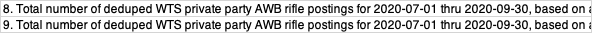

In [17]:
len(q3_2020[(q3_2020['DupeRemoveFlag']!=1) & 
            (q3_2020['sale_buy']=='For Sale') & 
            (q3_2020['sale_type'] =='Private Party')&
            (q3_2020['Exclude_Title_Cnt'].isnull()) &
            (q3_2020['Model_Title_Cnt'].notnull())])

46680

In [18]:
len(q3_2020[(q3_2020['DupeRemoveFlag']!=1) & 
            (q3_2020['sale_buy']=='For Sale') & 
            (q3_2020['sale_type'] =='Private Party')&
            (q3_2020['Exclude_Content_Cnt'].isnull()) &
            (q3_2020['Model_Content_Cnt'].notnull())])

36749

# B. Analysis

##   1. Combining all datasets

In [19]:
frames = [q1_2018, q2_2018,q3_2018,q4_2018,
          q1_2019, q2_2019, q3_2019, q4_2019, 
          q1_2020, april_2020, May_June_2020, q3_2020]

In [20]:
final_df = pd.concat(frames, ignore_index=True)



After confirmed with Kelly, we decided 3 things.

1. Create a column called category_grouping for 3 groups, Firearm, Firearm_Other, Non-Firearm.
2. Check Sale_type for Private party gun sale.
3. Like Anjali said before, I will use the following grouping for types of the firearms. <Br>
    a. Handgun - Category = 'Handgun' <br>
    b. Rifle - Category = "Rifle" AND model_title_cnt is null OR model_content_cnt is null) <br>
    c. Shotgun - Category = 'Shotgun'<br>
    d. Assault-style Rifles - category = 'Rifles' AND (model_title_cnt is not null OR model_content_cnt is not null) <Br>

In [21]:
firearm = ['Handguns', 'Rifles', 'Shotguns']
firearm_other = ['Gun Parts', 'Ammo', 'Magazines', 'Reloading', 'Antique Firearms', 'Tactical Gear', 
                 'Holsters',  'Muzzle Loaders', 'NFA Firearms', 'Gun Safes', 'Firearms Training']
non_firearm = ['Optics', 'Miscellaneous', 'Knievs', 'Archery', 'Vehicles', 'Air Guns', 
               'Targets and Range Equipment', 'Hunting Gear', 'Services', 'Events', 'Farming Equipment', 
               'Fishing Gear', 'Paintball/Airsoft', 'All Categories']

In [22]:
#Create a column called category_grouping for 3 groups, Firearm, Firearm_Other, Non-Firearm.

def cate_group(df):
    if df['category'] in firearm :
        return "Firearm Post"
    elif df['category'] in firearm_other:
        return "Firearm_Other Post"
    else:
        return "Non_Firearm Post"

In [23]:
# For whole data
final_df['Category_Group'] = final_df.apply(cate_group, axis=1)

### Firearm Category

Within Firearm Post, we want to determine its types.

a. Handgun - Category = 'Handgun'

b. Rifle - Category = "Rifle" AND model_title_cnt is null AND model_content_cnt is null)

c. Shotgun - Category = 'Shotgun'

d. Assault-style Rifles - category = 'Rifles' AND (model_title_cnt is not null OR model_content_cnt is not null)

In [24]:
conditions = [
    final_df['category'].eq('Handguns'),
    final_df['category'].eq("Rifles")& final_df['Model_Content_Cnt'].isnull() & \
    final_df['Model_Title_Cnt'].isnull(),
    final_df['category'].eq("Shotguns"),
    final_df['category'].eq("Rifles")& (final_df['Model_Content_Cnt'].notna() | \
                                             final_df['Model_Title_Cnt'].notna())
]

choices = ["Handguns", "Rifles", "Shotguns", "Assault-style Rifles"]

final_df['ET_Firearm_Type'] =  np.select(conditions, choices,default='Not_Firearm')

# illegal gun sale - without background check

it's going to depend on the state and their law. You'll want to use this google sheet as a reference (https://docs.google.com/spreadsheets/d/1HrSI25SrIMBAyvKYk7Y3yoiCvLsqcxcRuGXUmagUg8o/edit#gid=0) but i'll explain a bit more below.

1. For states where there is no background check law (column B), any firearm post listed by an unlicensed dealer (or private party) does not legally require a background check.

2. For states where there is a background check law (yes in column B) that's NOT highlighted in that pink color then all of the posts by unlicensed sellers do legally require a background check.

3. Then the states I've highlighted in that pink color are a little bit trickier because of new states passing background check laws:<br>

    a. For Nevada, if the post was by an unlicensed seller in either 2018 or 2019 then it did not legally require a check. However, starting January 2020 all posts do require a check <br>
    b. For New Mexico, posts by unlicensed sellers that were posted between January 2018 and June 2019 did not legally require a check. Posts between July 2019 and present do require a check.<br>
    c. For Virginia, posts by unlicensed sellers that were posted between January 2018 and June 2020 did not legally require a check. Posts between July 2020 and present do require a check.<br>
    d. Then for Maryland and Pennsylvania, handguns posted by unlicensed sellers do require a background check. Long guns (i.e. rifles, shotguns, and assault rifles do not.




In [25]:
no_bg = ['Alabama','Alaska','Arizona','Arkansas','Florida','Georgia','Idaho','Indiana','Kansas','Kentucky',
         'Louisiana','Maine','Minnesota','Mississippi','Missouri','Montana','New Hampshire','North Dakota',
         'Ohio','Oklahoma','South Carolina','South Dakota','Tennessee','Texas','Utah','West Virginia',
         'Wisconsin', 'Wyoming']
yes_bg = ['California', 'Colorado','Connecticut','Delaware','District of Columbia','Hawaii','Illinois','Iowa',
          'Massachusetts','Michigan','Nebraska','New Jersey','New York','North Carolina','Oregon','Rhode Island',
          'Vermont','Washington']
special_state = ['Maryland', 'Nevada','New Mexico','Pennsylvania','Virginia']

In [26]:
# change to datetime
final_df['listed_date'] = pd.to_datetime(final_df['listed_date'])

In [27]:
#Create a column called category_grouping for 3 groups, Firearm, Firearm_Other, Non-Firearm.

def legal_check(df):
    # First check it is Firearm post or not
    if (df['Category_Group'] == "Firearm Post") & (df['sale_type'] =='Private Party') :
        # if state is no background check, then it is legal
        if df['State'] in no_bg :
            return "No Background Check Required"
        # if state is required background check, then it is illegal
        elif df['State'] in yes_bg:
            return "Background Check Required"
        elif df['State'] in special_state:
            nv_date  = pd.to_datetime('01-01-2020').date()
            nm_date = pd.to_datetime('07-01-2019').date()
            vi_date = pd.to_datetime('07-01-2020').date()
            if (df['State']=='Nevada') & (df['listed_date']< nv_date):
                return 'No Background Check Required'
            elif (df['State']=='New Mexico') & (df['listed_date']< nm_date):
                return 'No Background Check Required'
            elif (df['State']=='Virginia') & (df['listed_date']< vi_date):
                return 'No Background Check Required'
            elif (df['State']=='Maryland') & (df['ET_Firearm_Type']!='Handguns'):
                return 'No Background Check Required'
            elif (df['State']=='Pennsylvania') & (df['ET_Firearm_Type']!='Handguns'):
                return 'No Background Check Required'
            else:
                return 'Background Check Required'
    elif (df['Category_Group'] == "Firearm Post") & (df['sale_type'] =='Premium Vendor') :
        return 'Background Check Required'
    else:
        return "Not_Firearm_Post"

In [28]:
final_df['Background_Check']= final_df.apply(legal_check, axis=1)

In [29]:
final_df['Background_Check'].value_counts()

No Background Check Required    3744001
Background Check Required       2468000
Not_Firearm_Post                2161478
Name: Background_Check, dtype: int64

In [30]:
#df = final_df[final_df['DupeRemoveFlag']!=1]
#df.to_csv("armslist_raw_data.csv", index= False)

##  ** All analyses for the below should be limited to Want to Sell (WTS) ads from Private Parties

In [31]:
wts_nbc_df = final_df[(final_df['DupeRemoveFlag']!=1) & 
            (final_df['sale_buy']=='For Sale') & 
            (final_df['Background_Check'] =='No Background Check Required')]

In [32]:
len(wts_nbc_df)

3220687

In [33]:
# 1. filter df for WTS and private parties only 


wts_pp_df = final_df[(final_df['DupeRemoveFlag']!=1) & 
            (final_df['sale_buy']=='For Sale') & 
            (final_df['sale_type'] =='Private Party')]

In [34]:
len(wts_pp_df)

6187958

There are 6,187,958 rows.

## 2. Main discoveries that we want to see

* The number of posts in an average year
* The number of posts in an average month
* The number of posts in an average day
* A breakdown of posts by gun type
* Trend graph in posts by month (particular focus on the COVID months)
* State per capita rankings (I would be curious how these relate to the estimated # of guns by state)


For The number of posts in an average year, I will group time by listed_date

In [35]:
#wts_pp_df.to_csv("wts_pp_df.csv", index=False)

In [112]:
wts_pp_df.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
listed_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-07,116028.0,NaN,7769732,2018-01-07,For Sale: Small Collection of German Handguns.,Handguns,Pistol,Greene,"SPFD, Springfield, Missouri",NaN,NaN,NaN,NaN,1.0,Private Party,Small Collection of German Handguns. 7 Lugers ...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2018-01-07 16:03:34.680000000,http://www.armslist.com/posts/7769732,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
2018-01-07,115037.0,NaN,7767216,2018-01-07,For Sale/Trade: 300AAC AR15 Pistol Upper,Handguns,Pistol,Madison,"Huntsville, Huntsville, Alabama",Single Action,Anderson Manufacturing,NaN,2014-02-09,400.0,Private Party,"300AAC AR15 Pistol Upper:ALG 10"" RailNoveske K...",Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:35.987000000,http://www.armslist.com/posts/7767216,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
2018-01-07,115037.0,NaN,7767236,2018-01-07,For Sale: S&W Model 36-10 Revolver,Handguns,Revolver,Madison,"Huntsville, Huntsville, Alabama",Double / Single Action,Smith & Wesson,38 S&W Special,2014-02-09,550.0,Private Party,S&W Model 36-10 RevolverPurchased new Summer 2...,Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:36.943000000,http://www.armslist.com/posts/7767236,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
2018-01-07,99474.0,NaN,7772635,2018-01-07,For Sale: Glock 19 Gen 4 with front serrations,Handguns,Pistol,Hillsborough,"Dover, Tampa/St. Pete, Florida",Striker Fire,Glock,9mm Luger (9x19),2017-07-25,550.0,Private Party,LNIB. Has front serrations from factory. Pol...,Dover,Florida,FL,27.975742,-82.2404,27.7716,-83.772789,27.975742,-82.240417,2018-01-07 16:03:37.730000000,http://www.armslist.com/posts/7772635,Firearms,For Sale,True,True,True,True,True,True,True,True,True,

In [113]:
# Year post
wts_pp_df.groupby([wts_pp_df.listed_date.dt.year, 'ET_Firearm_Type','Background_Check' ])['post_id'].count().reset_index()

,listed_date,ET_Firearm_Type,Background_Check,post_id
0,2018,Assault-style Rifles,Background Check Required,45408
1,2018,Assault-style Rifles,No Background Check Required,127429
2,2018,Handguns,Background Check Required,220843
3,2018,Handguns,No Background Check Required,549573
4,2018,Not_Firearm,Not_Firearm_Post,553401
5,2018,Rifles,Background Check Required,106493
6,2018,Rifles,No Background Check Required,298797
7,2018,Shotguns,Background Check Required,36170
8,2018,Shotguns,No Background Check Required,98260
9,2019,Assault-style Rifles,Background Check Required,47178


In [114]:
# For each month of Year
wts_pp_df.index = pd.to_datetime(wts_pp_df['listed_date'],format='%m/%d/%y %I:%M%p')

wts_pp_df.groupby(pd.Grouper(freq='M'))['post_id'].count()



listed_date
2018-01-31    174223
2018-02-28    159268
2018-03-31    163903
2018-04-30    159604
2018-05-31    167261
2018-06-30    161053
2018-07-31    175489
2018-08-31    168643
2018-09-30    162849
2018-10-31    171148
2018-11-30    173729
2018-12-31    199365
2019-01-31    224825
2019-02-28    192623
2019-03-31    205126
2019-04-30    180254
2019-05-31    175054
2019-06-30    189191
2019-07-31    186714
2019-08-31    188522
2019-09-30    169868
2019-10-31    208241
2019-11-30    202698
2019-12-31    177613
2020-01-31    172066
2020-02-29    206899
2020-03-31    241915
2020-04-30    221546
2020-05-31    168531
2020-06-30    173894
2020-07-31    205808
2020-08-31    231957
2020-09-30    228078
Freq: M, Name: post_id, dtype: int64

In [115]:

# Month Post

per = wts_pp_df.listed_date.dt.to_period("M") 
g = wts_pp_df.groupby([per, 'ET_Firearm_Type','Background_Check'])['post_id']

g.count().reset_index().sort_values(['listed_date', 'post_id'], ascending=[True, False]) 

,listed_date,ET_Firearm_Type,Background_Check,post_id
4,2018-01,Not_Firearm,Not_Firearm_Post,48007
3,2018-01,Handguns,No Background Check Required,45800
6,2018-01,Rifles,No Background Check Required,25056
2,2018-01,Handguns,Background Check Required,19475
1,2018-01,Assault-style Rifles,No Background Check Required,10725
...,...,...,...,...
289,2020-09,Assault-style Rifles,No Background Check Required,13654
293,2020-09,Rifles,Background Check Required,9896
296,2020-09,Shotguns,No Background Check Required,7738
288,2020-09,Assault-style Rifles,Background Check Required,5390


In [116]:
m =g.count().reset_index().sort_values(['listed_date', 'post_id'], ascending=[True, False])


In [119]:
m.rename(columns={"post_id": "total_#_post_id"}, inplace=True)

In [120]:
m.head()

,listed_date,ET_Firearm_Type,Background_Check,total_#_post_id
4,2018-01,Not_Firearm,Not_Firearm_Post,48007
3,2018-01,Handguns,No Background Check Required,45800
6,2018-01,Rifles,No Background Check Required,25056
2,2018-01,Handguns,Background Check Required,19475
1,2018-01,Assault-style Rifles,No Background Check Required,10725


In [ ]:
#m.to_csv('month.csv', index=False)

## Average


In [41]:
len(wts_pp_df[wts_pp_df['ET_Firearm_Type']!="Not_Firearm"])

4435134

In [42]:
# 2018 and 2019

len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& (wts_pp_df['listed_date']<'2020-01-01')])

3166562

In [43]:
print("per year", 3166562/2)
print("per month", 3166562/24)
# 2018-01-01 to 2019-12-31
print("per day",3166562/730)

per year 1583281.0
per month 131940.08333333334
per day 4337.756164383562


In [44]:
# In 2020 (COVID impact)

len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& (wts_pp_df['listed_date']>='2020-01-01')])

1268572

In [45]:
# from 1/1 - 9/30, its duration is 274 days
print("per month", 1268572/9)
print("per day",(1268572/274))

per month 140952.44444444444
per day 4629.824817518248


#### 2020 WTS&P.P. March 2020- Sept 2020 (Pandemic Season)

In [103]:
len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& (wts_pp_df['listed_date']>='2020-03-01')])

990866

In [104]:
# from 3/1 - 9/30, its duration is 214 days
print("per month", 990866/7)
print("per day",(990866/214))

per month 141552.2857142857
per day 4630.214953271028


#### 2018 and 2019 WTS&P.P& NBGCR

In [46]:
# 2018 and 2019 WTS&P.P& NBGCR
len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wts_pp_df['listed_date']<'2020-01-01')&
             (wts_pp_df['Background_Check']=='No Background Check Required')])

2312453

In [47]:
print("per year", 2312453/2)
print("per month", 2312453/24)
# 2018-01-01 to 2019-12-31
print("per day",2312453/730)

per year 1156226.5
per month 96352.20833333333
per day 3167.7438356164384


#### 2020 WTS&P.P& NBGCR

In [48]:
# 2020 WTS&P.P
len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wts_pp_df['listed_date']>='2020-01-01')&
             (wts_pp_df['Background_Check']=='No Background Check Required')])

908234

In [49]:
# from 1/1 - 9/30, its duration is 274 days
print("per month", 908234/9)
print("per day",(908234/274))

per month 100914.88888888889
per day 3314.7226277372265


#### March - Sept 2020

In [105]:
# 2020 WTS&P.P March- Sept
len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wts_pp_df['listed_date']>='2020-03-01')&
             (wts_pp_df['Background_Check']=='No Background Check Required')])

706215

In [106]:
# from 3/1 - 9/30, its duration is 214 days
print("per month", 706215/7)
print("per day",(706215/214))

per month 100887.85714285714
per day 3300.070093457944


#### 2018 and 2019 WTS&P.P& BGCR

In [50]:
# 2018 and 2019 WTS&P.P& BGCR
len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wts_pp_df['listed_date']<'2020-01-01')&
             (wts_pp_df['Background_Check']=='Background Check Required')])

853723

In [51]:
print("per year", 853723/2)
print("per month", 853723/24)
# 2018-01-01 to 2019-12-31
print("per day",853723/730)

per year 426861.5
per month 35571.791666666664
per day 1169.4835616438356


#### 2020 WTS&P.P& BGCR

In [52]:
# 2018 and 2019 WTS&P.P& BGCR
len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wts_pp_df['listed_date']>='2020-01-01')&
             (wts_pp_df['Background_Check']=='Background Check Required')])

359652

In [53]:
# from 1/1 - 9/30, its duration is 274 days
print("per month", 359652/9)
print("per day",(359652/274))

per month 39961.333333333336
per day 1312.5985401459855


#### 2020 WTS&P.P& BGCR March - Sept 2020

In [121]:
# 2018 and 2019 WTS&P.P& BGCR
len(wts_pp_df[(wts_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wts_pp_df['listed_date']>='2020-03-01')&
             (wts_pp_df['Background_Check']=='Background Check Required')])

284027

In [122]:
# from 3/1 - 9/30, its duration is 274 days
print("per month", 284027/7)
print("per day",(284027/214))

per month 40575.28571428572
per day 1327.228971962617


# State per capita rankings

For state per capita, I will use a population dataset from the Census Repo.
https://github.com/everytown/research-reference-state

The followings are how I analyze this State per Capita Ranking

1. Pull out each state and category data from the Armslist dataset - WTS & Private Party
2. Combine with 2019 & 2020 Dataset.
3. Armslist dataset that I aggregated is monthly data, so I will divide the yearly population estimate into 12 for each month to get per Capita.

In [54]:
#wts_pp_df[wts_pp_df['ET_Firearm_Type']!='Not_Firearm']

In [123]:
# YEAR and State
# New DF with only firearm

wts_pp_df1 = wts_pp_df[wts_pp_df['ET_Firearm_Type']!='Not_Firearm']


# Year post
state_year = wts_pp_df1.groupby([wts_pp_df1.listed_date.dt.year, 'State','Background_Check'])['post_id'].count().reset_index()


In [124]:

# population dataset
pop = pd.read_csv("/Users/jasonlim/Documents/GitHub/research-reference-state/Household/household_2001to2020.csv")


# only Year 2019 and 2020 data
pop_18_20 = pop[(pop['Year'] == 2018) |(pop['Year'] == 2019) | (pop['Year'] == 2020)]

In [125]:
state_year

,listed_date,State,Background_Check,post_id
0,2018,Alabama,No Background Check Required,43901
1,2018,Alaska,No Background Check Required,1550
2,2018,Arizona,No Background Check Required,54155
3,2018,Arkansas,No Background Check Required,18599
4,2018,California,Background Check Required,36783
...,...,...,...,...
153,2020,Virginia,No Background Check Required,26574
154,2020,Washington,Background Check Required,24905
155,2020,West Virginia,No Background Check Required,4728
156,2020,Wisconsin,No Background Check Required,37092


In [126]:
# combine with state dataset 

state_pop_year = state_year.merge(pop_18_20, how='inner', left_on=['State', 'listed_date'], right_on=['NAME', 'Year'])

In [127]:
# for 2020, there are only 9 months. So, for yearly calculation, we need to use 9months portion from 12 months.

def per_cap_cal(df):
    if df['Year'] != 2020:
        # calculate for whole year of population
        return df['post_id'] / df['Pop_Total']
    else:
        # For 2020, calcualte for 9 months 
        return df['post_id'] / (9*(df['Pop_Total']/12))
    
    
# for 2020, there are only 9 months. So, for yearly calculation, we need to use 9months portion from 12 months.

def per_Household_cal(df):
    if df['Year'] != 2020:
        # calculate for whole year of household pop
        return df['post_id'] / df['Household_total']
    else:
        # For 2020, calcualte for 9 months 
        return df['post_id'] / (9*(df['Household_total']/12))

In [128]:
state_pop_year['Per_Capita'] = state_pop_year.apply(per_cap_cal, axis=1)
state_pop_year['Per_Household_Capita'] = state_pop_year.apply(per_Household_cal, axis=1)

In [129]:
# Times 100,000 for 100,000 residence
state_pop_year['Per_100,000'] = state_pop_year['Per_Capita']*100000
state_pop_year['Per_100,000_HH'] = state_pop_year['Per_Household_Capita']*100000

In [131]:
state_pop_year.rename(columns={"post_id": "total_#_post_id"}, inplace=True)

In [133]:
state_pop_year.head()

,listed_date,State,Background_Check,total_#_post_id,NAME,Pop_Total,Household_total,Fips_State,Year,Per_Capita,Per_Household_Capita,"Per_100,000","Per_100,000_HH"
0,2018,Alabama,No Background Check Required,43901,Alabama,4887871,1855184,1,2018,0.008982,0.023664,898.162001,2366.396002
1,2018,Alaska,No Background Check Required,1550,Alaska,737438,254551,2,2018,0.002102,0.006089,210.187161,608.915306
2,2018,Arizona,No Background Check Required,54155,Arizona,7171646,2614298,4,2018,0.007551,0.020715,755.126508,2071.492997
3,2018,Arkansas,No Background Check Required,18599,Arkansas,3013825,1156347,5,2018,0.006171,0.016084,617.122759,1608.427228
4,2018,California,Background Check Required,36783,California,39557045,13072122,6,2018,0.000930,0.002814,92.987229,281.385073


In [64]:
#state_pop_year.to_csv("state_pop_year.csv", index= False)

In [135]:
wts_pp_df1.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
listed_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-07,116028.0,NaN,7769732,2018-01-07,For Sale: Small Collection of German Handguns.,Handguns,Pistol,Greene,"SPFD, Springfield, Missouri",NaN,NaN,NaN,NaN,1.0,Private Party,Small Collection of German Handguns. 7 Lugers ...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2018-01-07 16:03:34.680000000,http://www.armslist.com/posts/7769732,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
2018-01-07,115037.0,NaN,7767216,2018-01-07,For Sale/Trade: 300AAC AR15 Pistol Upper,Handguns,Pistol,Madison,"Huntsville, Huntsville, Alabama",Single Action,Anderson Manufacturing,NaN,2014-02-09,400.0,Private Party,"300AAC AR15 Pistol Upper:ALG 10"" RailNoveske K...",Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:35.987000000,http://www.armslist.com/posts/7767216,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
2018-01-07,115037.0,NaN,7767236,2018-01-07,For Sale: S&W Model 36-10 Revolver,Handguns,Revolver,Madison,"Huntsville, Huntsville, Alabama",Double / Single Action,Smith & Wesson,38 S&W Special,2014-02-09,550.0,Private Party,S&W Model 36-10 RevolverPurchased new Summer 2...,Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:36.943000000,http://www.armslist.com/posts/7767236,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
2018-01-07,99474.0,NaN,7772635,2018-01-07,For Sale: Glock 19 Gen 4 with front serrations,Handguns,Pistol,Hillsborough,"Dover, Tampa/St. Pete, Florida",Striker Fire,Glock,9mm Luger (9x19),2017-07-25,550.0,Private Party,LNIB. Has front serrations from factory. Pol...,Dover,Florida,FL,27.975742,-82.2404,27.7716,-83.772789,27.975742,-82.240417,2018-01-07 16:03:37.730000000,http://www.armslist.com/posts/7772635,Firearms,For Sale,True,True,True,True,True,True,True,True,True,

In [136]:
per = wts_pp_df1.listed_date.dt.to_period("M")

# Getting state dataset first
state = wts_pp_df1.groupby([per, 'State','ET_Firearm_Type','Background_Check'])['post_id'].count().reset_index()

# Create year column in state df, so we can join with pop df easily
state['Year'] = state['listed_date'].astype(str).str[0:4].astype(int)

#state.head()

#pop_18_20.head()

In [137]:
# combine with state dataset 

state_pop = state.merge(pop_18_20, how='inner', left_on=['State', 'Year'], right_on=['NAME', 'Year'])


In [138]:
state_pop['post_id'] / (state_pop['Pop_Total']/12)

0       0.001210
1       0.005107
2       0.002737
3       0.000886
4       0.001026
          ...   
6595    0.000519
6596    0.001309
6597    0.005940
6598    0.002222
6599    0.000706
Length: 6600, dtype: float64

In [139]:
# pop/12 for monthly measure


state_pop['Per_Capita'] = state_pop['post_id'] / (state_pop['Pop_Total']/12)
state_pop['Per_Household_Capita'] = state_pop['post_id'] / (state_pop['Household_total']/12)

In [140]:
state_pop.head()

,listed_date,State,ET_Firearm_Type,Background_Check,post_id,Year,NAME,Pop_Total,Household_total,Fips_State,Per_Capita,Per_Household_Capita
0,2018-01,Alabama,Assault-style Rifles,No Background Check Required,493,2018,Alabama,4887871,1855184,1,0.001210,0.003189
1,2018-01,Alabama,Handguns,No Background Check Required,2080,2018,Alabama,4887871,1855184,1,0.005107,0.013454
2,2018-01,Alabama,Rifles,No Background Check Required,1115,2018,Alabama,4887871,1855184,1,0.002737,0.007212
3,2018-01,Alabama,Shotguns,No Background Check Required,361,2018,Alabama,4887871,1855184,1,0.000886,0.002335
4,2018-02,Alabama,Assault-style Rifles,No Background Check Required,418,2018,Alabama,4887871,1855184,1,0.001026,0.002704


In [141]:
state_pop.rename(columns={"post_id": "total_#_post_id"}, inplace=True)

In [143]:
state_pop.head()

,listed_date,State,ET_Firearm_Type,Background_Check,total_#_post_id,Year,NAME,Pop_Total,Household_total,Fips_State,Per_Capita,Per_Household_Capita
0,2018-01,Alabama,Assault-style Rifles,No Background Check Required,493,2018,Alabama,4887871,1855184,1,0.001210,0.003189
1,2018-01,Alabama,Handguns,No Background Check Required,2080,2018,Alabama,4887871,1855184,1,0.005107,0.013454
2,2018-01,Alabama,Rifles,No Background Check Required,1115,2018,Alabama,4887871,1855184,1,0.002737,0.007212
3,2018-01,Alabama,Shotguns,No Background Check Required,361,2018,Alabama,4887871,1855184,1,0.000886,0.002335
4,2018-02,Alabama,Assault-style Rifles,No Background Check Required,418,2018,Alabama,4887871,1855184,1,0.001026,0.002704


In [72]:

# state_pop.to_csv("state_pop_month.csv", index= False)

In [74]:
state_pop.apply(per_cap_cal, axis=1)

0       0.000101
1       0.000426
2       0.000228
3       0.000074
4       0.000086
          ...   
6595    0.000058
6596    0.000145
6597    0.000660
6598    0.000247
6599    0.000078
Length: 6600, dtype: float64

In [144]:
per = wts_pp_df1.listed_date.dt.to_period("M")

# Getting state dataset first
state = wts_pp_df1.groupby([per, 'State'])['post_id'].count().reset_index()

# Create year column in state df, so we can join with pop df easily
state['Year'] = state['listed_date'].astype(str).str[0:4].astype(int)

# combine with state dataset 

state_pop = state.merge(pop_18_20, how='inner', left_on=['State', 'Year'], right_on=['NAME', 'Year'])
# pop/12 for monthly measure


state_pop['Per_Capita'] = state_pop['post_id'] / (state_pop['Pop_Total']/12)
state_pop['Per_Household_Capita'] = state_pop['post_id'] / (state_pop['Household_total']/12)

#state_pop.to_csv("state_pop_month2.csv", index= False)

In [145]:
state_pop.rename(columns={"post_id": "total_#_post_id"}, inplace=True)

In [146]:
state_pop.head()

,listed_date,State,total_#_post_id,Year,NAME,Pop_Total,Household_total,Fips_State,Per_Capita,Per_Household_Capita
0,2018-01,Alabama,4049,2018,Alabama,4887871,1855184,1,0.009941,0.026190
1,2018-02,Alabama,3657,2018,Alabama,4887871,1855184,1,0.008978,0.023655
2,2018-03,Alabama,3593,2018,Alabama,4887871,1855184,1,0.008821,0.023241
3,2018-04,Alabama,3158,2018,Alabama,4887871,1855184,1,0.007753,0.020427
4,2018-05,Alabama,3397,2018,Alabama,4887871,1855184,1,0.008340,0.021973


# WTB with PP

In [147]:
final_df.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
0,116028.0,NaN,7769732,2018-01-07,For Sale: Small Collection of German Handguns.,Handguns,Pistol,Greene,"SPFD, Springfield, Missouri",NaN,NaN,NaN,NaN,1.0,Private Party,Small Collection of German Handguns. 7 Lugers ...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2018-01-07 16:03:34.680000000,http://www.armslist.com/posts/7769732,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
1,115037.0,NaN,7767216,2018-01-07,For Sale/Trade: 300AAC AR15 Pistol Upper,Handguns,Pistol,Madison,"Huntsville, Huntsville, Alabama",Single Action,Anderson Manufacturing,NaN,2014-02-09,400.0,Private Party,"300AAC AR15 Pistol Upper:ALG 10"" RailNoveske K...",Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:35.987000000,http://www.armslist.com/posts/7767216,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
2,115037.0,NaN,7767236,2018-01-07,For Sale: S&W Model 36-10 Revolver,Handguns,Revolver,Madison,"Huntsville, Huntsville, Alabama",Double / Single Action,Smith & Wesson,38 S&W Special,2014-02-09,550.0,Private Party,S&W Model 36-10 RevolverPurchased new Summer 2...,Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:36.943000000,http://www.armslist.com/posts/7767236,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
3,99474.0,NaN,7772635,2018-01-07,For Sale: Glock 19 Gen 4 with front serrations,Handguns,Pistol,Hillsborough,"Dover, Tampa/St. Pete, Florida",Striker Fire,Glock,9mm Luger (9x19),2017-07-25,550.0,Private Party,LNIB. Has front serrations from factory. Pol...,Dover,Florida,FL,27.975742,-82.2404,27.7716,-83.772789,27.975742,-82.240417,2018-01-07 16:03:37.730000000,http://www.armslist.com/posts/7772635,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [148]:
final_df['sale_buy'].value_counts()

For Sale       7797460
For Trade       343388
Want to Buy     233843
1                    7
Name: sale_buy, dtype: int64

In [149]:
# 1. filter df for WTB and private parties only

wtb_pp_df = final_df[(final_df['DupeRemoveFlag']!=1) & 
            (final_df['sale_buy']=='Want to Buy') & 
            (final_df['sale_type'] =='Private Party')]


In [150]:
wtb_pp_df.head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
197,123405.0,NaN,7797826,2018-01-07,Want To Buy: WTB,Handguns,Pistol,Yellowstone,"Heights, Billings, Montana",NaN,NaN,NaN,NaN,NaN,Private Party,I'm looking for a mouse gun of sorts. I had on...,Billings,Montana,MT,45.686966,-108.387,46.7805,-110.001020,45.686966,-108.387390,2018-01-07 16:44:58.683000000,http://www.armslist.com/posts/7797826,Firearms,Want to Buy,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
276,1426.0,NaN,7459849,2018-01-07,Want To Buy: Looking for a CZ P10C,Handguns,Pistol,Riverside,"Murrieta, Inland Empire, California",Striker Fire,CZ USA,9mm Luger (9x19),2016-07-08,NaN,Private Party,I'm looking for a CZ P10C to buy. FDE is prefe...,Murrieta,California,CA,33.442039,-116.861,37.2861,-119.279170,33.442039,-116.861030,2018-01-07 16:47:46.983000000,http://www.armslist.com/posts/7459849,Firearms,Want to Buy,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0,Firearm Post,Handguns,Background Check Required
382,42793.0,NaN,7797894,2018-01-07,Want To Buy: Glock Specter Polymer 80,Gun Parts,Parts & Accessories,Cumberland,"Spring Lake, Fayetteville, North Carolina",NaN,NaN,NaN,2015-11-19,1.0,Private Party,Would like to buy an unfinished glock specter ...,Spring Lake,North Carolina,NC,35.189079,-78.9772,35.2004,-79.819618,35.189079,-78.977242,2018-01-07 17:00:47.073000000,http://www.armslist.com/posts/7797894,Accessories,Want to Buy,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm_Other Post,Not_Firearm,Not_Firearm_Post
436,122785.0,NaN,7797933,2018-01-07,Want To Buy: LOOKING FOR SIG P938,Handguns,Handguns,Porter,"Laporte, Valparaiso, Indiana",NaN,NaN,NaN,2011-12-14,NaN,Private Party,"looking for a sig p938, really looking for the...",Valparaiso,Indiana,IN,41.454731,-87.0656,39.8195,-86.372078,41.454731,-87.065567,2018-01-07 17:08:48.360000000,http://www.armslist.com/posts/7797933,Firearms,Want to Buy,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handgu

In [151]:
len(wtb_pp_df)

218062

There are 218,062 Want to Buy and Private posts

In [152]:
# Year post

# New DF with only firearm

wtb_pp_df1 = wtb_pp_df[wtb_pp_df['ET_Firearm_Type']!='Not_Firearm']
wtb_pp_df1.groupby([wtb_pp_df1.listed_date.dt.year, 'ET_Firearm_Type','Background_Check'])['post_id'].count().reset_index()

,listed_date,ET_Firearm_Type,Background_Check,post_id
0,2018,Assault-style Rifles,Background Check Required,1024
1,2018,Assault-style Rifles,No Background Check Required,3329
2,2018,Handguns,Background Check Required,6508
3,2018,Handguns,No Background Check Required,22540
4,2018,Rifles,Background Check Required,3316
5,2018,Rifles,No Background Check Required,10428
6,2018,Shotguns,Background Check Required,982
7,2018,Shotguns,No Background Check Required,3093
8,2019,Assault-style Rifles,Background Check Required,767
9,2019,Assault-style Rifles,No Background Check Required,3297


In [153]:

# Month Post

per = wtb_pp_df1.listed_date.dt.to_period("M") 
g = wtb_pp_df1.groupby([per, 'ET_Firearm_Type','Background_Check'])['post_id']

m =g.count().reset_index().sort_values(['listed_date', 'post_id'], ascending=[True, False])


In [154]:
m.rename(columns={"post_id": "total_#_post_id"}, inplace=True)

In [155]:
m.head()

,listed_date,ET_Firearm_Type,Background_Check,total_#_post_id
3,2018-01,Handguns,No Background Check Required,2129
5,2018-01,Rifles,No Background Check Required,966
2,2018-01,Handguns,Background Check Required,643
4,2018-01,Rifles,Background Check Required,337
7,2018-01,Shotguns,No Background Check Required,328


In [84]:
# m.to_csv('month_wtb.csv', index=False)

In [156]:
# YEAR and State
# New DF with only firearm




# Year post
state_year_wtb = wtb_pp_df1.groupby([wtb_pp_df1.listed_date.dt.year, 'State','Background_Check'])['post_id'].count().reset_index()
# combine with state dataset 

state_pop_year_wtb = state_year_wtb.merge(pop_18_20, how='inner', left_on=['State', 'listed_date'], right_on=['NAME', 'Year'])

state_pop_year_wtb['Per_Capita'] = state_pop_year_wtb.apply(per_cap_cal, axis=1)
state_pop_year_wtb['Per_Household_Capita'] = state_pop_year_wtb.apply(per_Household_cal, axis=1)


In [157]:
# Times 100,000 for 100,000 residence
state_pop_year_wtb['Per_100,000'] = state_pop_year_wtb['Per_Capita']*100000
state_pop_year_wtb['Per_100,000_HH'] = state_pop_year_wtb['Per_Household_Capita']*100000

In [158]:
state_pop_year_wtb.tail()

,listed_date,State,Background_Check,post_id,NAME,Pop_Total,Household_total,Fips_State,Year,Per_Capita,Per_Household_Capita,"Per_100,000","Per_100,000_HH"
153,2020,Virginia,No Background Check Required,1673,Virginia,8517685,3175524,51,2020,0.000262,0.000702,26.188649,70.245625
154,2020,Washington,Background Check Required,759,Washington,7535591,2895575,53,2020,0.000134,0.000349,13.429604,34.949880
155,2020,West Virginia,No Background Check Required,285,West Virginia,1805832,734703,54,2020,0.000210,0.000517,21.042932,51.721580
156,2020,Wisconsin,No Background Check Required,2489,Wisconsin,5813568,2371960,55,2020,0.000571,0.001399,57.084852,139.912421
157,2020,Wyoming,No Background Check Required,176,Wyoming,577737,230252,56,2020,0.000406,0.001019,40.618251,101.917320


In [159]:
state_pop_year_wtb.rename(columns={"post_id": "total_#_post_id"}, inplace=True)

In [88]:
#state_pop_year_wtb.to_csv("wtb_state_pop_Year.csv", index= False)

In [160]:
per = wtb_pp_df1.listed_date.dt.to_period("M")

# Getting state dataset first
state = wtb_pp_df1.groupby([per, 'State','ET_Firearm_Type','Background_Check'])['post_id'].count().reset_index()

# Create year column in state df, so we can join with pop df easily
state['Year'] = state['listed_date'].astype(str).str[0:4].astype(int)

# combine with state dataset 

state_pop = state.merge(pop_18_20, how='inner', left_on=['State', 'Year'], right_on=['NAME', 'Year'])
# pop/12 for monthly measure


state_pop['Per_Capita'] = state_pop['post_id'] / (state_pop['Pop_Total']/12)
state_pop['Per_Household_Capita'] = state_pop['post_id'] / (state_pop['Household_total']/12)

state_pop['Per_100,000'] = state_pop['Per_Capita']*100000
state_pop['Per_100,000_HH'] = state_pop['Per_Household_Capita']*100000



In [161]:
state_pop.rename(columns={"post_id": "total_#_post_id"}, inplace=True)

In [162]:
state_pop.head()

,listed_date,State,ET_Firearm_Type,Background_Check,total_#_post_id,Year,NAME,Pop_Total,Household_total,Fips_State,Per_Capita,Per_Household_Capita,"Per_100,000","Per_100,000_HH"
0,2018-01,Alabama,Assault-style Rifles,No Background Check Required,6,2018,Alabama,4887871,1855184,1,0.000015,0.000039,1.473034,3.881017
1,2018-01,Alabama,Handguns,No Background Check Required,87,2018,Alabama,4887871,1855184,1,0.000214,0.000563,21.358992,56.274741
2,2018-01,Alabama,Rifles,No Background Check Required,42,2018,Alabama,4887871,1855184,1,0.000103,0.000272,10.311238,27.167117
3,2018-01,Alabama,Shotguns,No Background Check Required,11,2018,Alabama,4887871,1855184,1,0.000027,0.000071,2.700562,7.115197
4,2018-02,Alabama,Assault-style Rifles,No Background Check Required,15,2018,Alabama,4887871,1855184,1,0.000037,0.000097,3.682585,9.702542


In [90]:
#state_pop.to_csv("wtb_state_pop_month2.csv", index= False)

# Average

In [163]:
# Range of 2018-2019
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& (wtb_pp_df['listed_date']<'2020-01-01')])

101702

In [164]:

print("per year", 101702/2)
print("per month", 101702/24)
print("per day",101702/730)

per year 50851.0
per month 4237.583333333333
per day 139.3178082191781


In [165]:
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& (wtb_pp_df['listed_date']>='2020-01-01')])

67039

In [166]:
# from 1/1 - 9/30, its duration is 274 days
print("per month", 67039/9)
print("per day",(67039/274))

per month 7448.777777777777
per day 244.66788321167883


#### 2020 WTB&P.P March - Sept

In [167]:
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& (wtb_pp_df['listed_date']>='2020-03-01')])

56926

In [168]:
# from 3/1 - 9/30, its duration is 214 days
print("per month", 56926/7)
print("per day",(56926/214))

per month 8132.285714285715
per day 266.0093457943925


#### 2018-2019 WTB&P.P&NBGR

In [95]:
# Range of 2018-2019
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wtb_pp_df['listed_date']<'2020-01-01')&
             (wtb_pp_df['Background_Check']=='No Background Check Required')])

78838

In [96]:

print("per year", 78838/2)
print("per month", 78838/24)
print("per day",78838/730)

per year 39419.0
per month 3284.9166666666665
per day 107.9972602739726


#### 2020 WTB&P.P&NBGR

In [97]:
# Range of 2018-2019
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wtb_pp_df['listed_date']>='2020-01-01')&
             (wtb_pp_df['Background_Check']=='No Background Check Required')])

52164

In [110]:
# from 1/1 - 9/30, its duration is 274 days
print("per month", 52164/9)
print("per day",(52164/274))

per month 5796.0
per day 190.37956204379563


#### 2020 WTB&P.P.&NBGR March - Sept 2020

In [107]:
# Range of 2018-2019
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wtb_pp_df['listed_date']>='2020-03-01')&
             (wtb_pp_df['Background_Check']=='No Background Check Required')])

44164

In [111]:
# from 1/1 - 9/30, its duration is 273 days
print("per month", 44164/7)
print("per day",(44164/214))

per month 6309.142857142857
per day 206.37383177570092


#### 2018-2019 WTB&P.P& BGR

In [99]:
# Range of 2018-2019
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wtb_pp_df['listed_date']<'2020-01-01')&
             (wtb_pp_df['Background_Check']=='Background Check Required')])

22862

In [100]:

print("per year", 22862/2)
print("per month", 22862/24)
print("per day",22862/730)

per year 11431.0
per month 952.5833333333334
per day 31.317808219178083


#### 2020 WTB&P.P&NBGR

In [101]:
# Range of 2018-2019
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wtb_pp_df['listed_date']>='2020-01-01')&
             (wtb_pp_df['Background_Check']=='Background Check Required')])

14873

In [170]:
# from 1/1 - 9/30, its duration is 273 days
print("per month", 14873/9)
print("per day",(14873/274))

per month 1652.5555555555557
per day 54.28102189781022


#### 2020 WTB&P.P&NBGR March - Sept

In [169]:
# Range of 2018-2019
len(wtb_pp_df[(wtb_pp_df['ET_Firearm_Type']!="Not_Firearm")& 
              (wtb_pp_df['listed_date']>='2020-03-01')&
             (wtb_pp_df['Background_Check']=='Background Check Required')])

12760

In [171]:
# from 1/1 - 9/30, its duration is 273 days
print("per month", 12760/7)
print("per day",(12760/214))

per month 1822.857142857143
per day 59.626168224299064




# Text search for COVID

In [87]:
sample = final_df.head()

In [88]:
sample

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check
0,116028.0,NaN,7769732,2018-01-07,For Sale: Small Collection of German Handguns.,Handguns,Pistol,Greene,"SPFD, Springfield, Missouri",NaN,NaN,NaN,NaN,1.0,Private Party,Small Collection of German Handguns. 7 Lugers ...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2018-01-07 16:03:34.680000000,http://www.armslist.com/posts/7769732,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
1,115037.0,NaN,7767216,2018-01-07,For Sale/Trade: 300AAC AR15 Pistol Upper,Handguns,Pistol,Madison,"Huntsville, Huntsville, Alabama",Single Action,Anderson Manufacturing,NaN,2014-02-09,400.0,Private Party,"300AAC AR15 Pistol Upper:ALG 10"" RailNoveske K...",Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:35.987000000,http://www.armslist.com/posts/7767216,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required
2,115037.0,NaN,7767236,2018-01-07,For Sale: S&W Model 36-10 Revolver,Handguns,Revolver,Madison,"Huntsville, Huntsville, Alabama",Double / Single Action,Smith & Wesson,38 S&W Special,2014-02-09,550.0,Private Party,S&W Model 36-10 RevolverPurchased new Summer 2...,Huntsville,Alabama,AL,34.733963,-86.5229,32.6096,-86.729843,34.733963,-86.522911,2018-01-07 16:03:36.943000000,http://www.armslist.com/posts/7767236,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0,Firearm Post,Handguns,No Background Check Required
3,99474.0,NaN,7772635,2018-01-07,For Sale: Glock 19 Gen 4 with front serrations,Handguns,Pistol,Hillsborough,"Dover, Tampa/St. Pete, Florida",Striker Fire,Glock,9mm Luger (9x19),2017-07-25,550.0,Private Party,LNIB. Has front serrations from factory. Pol...,Dover,Florida,FL,27.975742,-82.2404,27.7716,-83.772789,27.975742,-82.240417,2018-01-07 16:03:37.730000000,http://www.armslist.com/posts/7772635,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [89]:
sample['post_content'].str.contains('Model', case=False)

0    False
1    False
2     True
3    False
4     True
Name: post_content, dtype: bool

In [90]:
final_df['Covid'] = \
    np.where(final_df['post_content'].str.contains('COVID', case=False, na=False), 1, 0)



In [91]:
final_df['Covid'].value_counts()

0    8371255
1       3450
Name: Covid, dtype: int64

In [92]:
final_df['pandemic'] = \
    np.where(final_df['post_content'].str.contains('pandemic', case=False, na=False), 1, 0)


In [93]:
final_df['pandemic'].value_counts()

0    8373713
1        992
Name: pandemic, dtype: int64

In [94]:
final_df[final_df['pandemic']==1]['post_content'].iloc[5]

'Real US Military Pandemic Flu Preparedness Kit, designed by military health officials for issue to military families. This kit is perfect for keeping at work, in your car or sending off to school with college bound students. The convenient sealed packaging is also ideal for travelers to carry no matter where they travel. Contains 4 surgical masks, 2 NIOSH approved N95 respirator masks, 4oz bottle of hand sanitizer and instruction card that contains instructions for use as well as information on how to prepare for and remain safe during a pandemic. While basic, the contents of this kit are essential for providing protection in the event of a pandemic.Official Pandemic Flu Preparedness Kit Designed For Issue To Military FamiliesContains 4 Surgical Masks, 2 NIOSH Approved N95 Masks, 4oz Bottle of Hand Sanitizer & Info CardConvenient Packaging To Carry For Travel & To Work, School Or Anywhere Else Or Keep In Your CarCall or text me. 606-594-1471 James I have 140 kits total.'


# Check non-firearm post that marked as firearm


When I filtered post content that contains “COVID” and “Pandemic” for 2020 Firearm post, I found categorizing mistakes from K2. As we can see from its title, some Mask and sanitizer posts are categorized as firearm posts. Please see Covid_df csv file. 

1. narrowed down to 2020 dataset because first U.S. COVID was at 1/22/2020. 
2. See its title - whether it contains mask or santizers to filter out
3. count the number of the post.
4. Vet its number, so I may have an idea about how it influences my analysis.



In [95]:
final_df['mask'] = \
    np.where(final_df['title'].str.contains('mask', case=False, na=False), 1, 0)


In [96]:
final_df['sanitizer'] = \
    np.where(final_df['title'].str.contains('sanitizer', case=False, na=False), 1, 0)


In [97]:
final_df['mask'].value_counts()

0    8372574
1       2131
Name: mask, dtype: int64

In [98]:
final_df['sanitizer'].value_counts()

0    8374622
1         83
Name: sanitizer, dtype: int64

In [99]:
len(final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     (final_df['mask']==1)])

104

In [100]:
len(final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     (final_df['sanitizer']==1)])

14

In [101]:
# Check for Both
len(final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     ((final_df['mask']==1)&(final_df['sanitizer']==1))])

0

In [102]:
len(final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     ((final_df['mask']==1)|(final_df['sanitizer']==1))])

118

In [103]:
mis_cate = final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     ((final_df['mask']==1)|(final_df['sanitizer']==1))]



mis_cate.to_csv("mis_category.csv", index=False)

In [104]:
# total year 2020 count
len(final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')])

1890571

### There are 104 posts that marked as firearm, but mask post  and 14 posts with sanitizers in the firearm marked post

So, there are 118 posts that are marked possibly wrong. 

In [105]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     (final_df['sanitizer']==1)]

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check,Covid,pandemic,mask,sanitizer
6233394,1051308.0,NaN,11283262,2020-03-02,For Sale/Trade: Purell 2-pack Hand Sanitizer ...,Handguns,Derringer,Cook,"Southwest Side, Chicago, Illinois",Bolt Action,Adams Arms,10mm,2019-11-22,150.0,Private Party,2-pack 10oz each. Very limited stock remaining...,Chicago,Illinois,IL,41.811928,-87.6873,39.7552,-89.482040,41.811928,-87.687317,2020-03-02 19:50:47.593000000,http://www.armslist.com/posts/11283262,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns,Background Check Required,0,1,0,1
6273832,1051308.0,NaN,11305159,2020-03-07,Want To Buy: WTB Purell Hand Sanitizer,Handguns,Derringer,Cook,"Southwest Side, Chicago, Illinois",Bolt Action,Adams Arms,10mm,2019-11-22,NaN,Private Party,"Looking to purchase Purell Hand Sanitizer, 3M ...",Chicago,Illinois,IL,41.811928,-87.6873,39.7552,-89.482040,41.811928,-87.687317,2020-03-07 12:18:32.437000000,http://www.armslist.com/posts/11305159,Firearms,Want to Buy,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.111111e+13,NaN,0.0,Firearm Post,Handguns,Background Check Required,0,0,0,1
6273941,1051308.0,NaN,11305159,2020-03-07,Want To Buy: WTB Purell Hand Sanitizer,Handguns,Derringer,Cook,"Southwest Side, Chicago, Illinois",Bolt Action,Adams Arms,10mm,2019-11-22,NaN,Private Party,"Looking to purchase Purell Hand Sanitizer, 3M ...",Chicago,Illinois,IL,41.811928,-87.6873,39.7552,-89.482040,41.811928,-87.687317,2020-03-07 12:27:50.290000000,http://www.armslist.com/posts/11305159,Firearms,Want to Buy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,K2,0.0,Firearm Post,Handguns,Background Check Required,0,0,0,1
6302794,1441012.0,NaN,11317355,2020-03-09,For Sale/Trade: Hand sanitizer,Handguns,Handguns,Clark,"Las Vegas, Las Vegas, Nevada",NaN,NaN,NaN,NaN,0.0,Private Party,Will trade for ammo or guns this is precious n...,Las Vegas,Nevada,NV,36.173721,-115.106,38.5826,-117.035640,36.173721,-115.106470,2020-03-09 22:28:13.903000000,http://www.armslist.com/posts/11317355,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0

In [106]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     (final_df['sanitizer']==1)]['title'].iloc[3]

'For Sale/Trade:  Hand sanitizer'

In [108]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                     (final_df['sanitizer']==1)]['title'].iloc[9]

'For Trade:  43 Items Everything WTT Rifles Pistols Hand Sanitizer Disinfectant Alcohol Wipes'

#### Some contents include firearm posts. And its number are relatively small than our analysis. 
But still, we need to raise this to K2

In [109]:
# Protest word check

final_df['protest'] = \
    np.where(final_df['post_content'].str.contains('protest', case=False, na=False), 1, 0)



In [110]:
final_df['protest'].value_counts()

0    8374596
1        109
Name: protest, dtype: int64

In [111]:
# number of firearm post that has protest word in post content
len(final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')&
             (final_df['listed_date']>='2020-01-01')&
             (final_df['protest']==1)])

55

#### 55 firearm posts in 2020 have protest in the content

In [112]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
         (final_df['listed_date']>='2020-01-01')&
         (final_df['protest']==1)].head()

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check,Covid,pandemic,mask,sanitizer,protest
5735262,1385525.0,NaN,10866536,2020-01-01,For Sale: Factory build special edition - Spi...,Rifles,Rifle,Greene,"Springfield, Springfield, Missouri",Semi-Automatic,Spikes Tactical,5.56×45mm NATO,2018-05-23,1100.0,Private Party,Email with your phone number please. Inquiries...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2020-01-01 12:19:27.437000000,http://www.armslist.com/posts/10866536,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,True,False,1.0,NaN,1,1,NaN,NaN,AR-15,NaN,tactical,tactical,NaN,NaN,N,1.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.001000e+04,NaN,0.0,Firearm Post,Assault-style Rifles,No Background Check Required,0,0,0,0,1
5781506,1385525.0,NaN,10866536,2020-01-07,For Sale: Factory build special edition - Spi...,Rifles,Rifle,Greene,"Springfield, Springfield, Missouri",Semi-Automatic,Spikes Tactical,5.56×45mm NATO,2018-05-23,1100.0,Private Party,Email with your phone number please. Inquiries...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2020-01-07 14:11:16.357000000,http://www.armslist.com/posts/10866536,Firearms,For Sale,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1.0,NaN,1,1,NaN,NaN,AR-15,NaN,tactical,tactical,NaN,NaN,N,1.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,K2,0.0,Firearm Post,Assault-style Rifles,No Background Check Required,0,0,0,0,1
5800811,1651709.0,NaN,11027945,2020-01-13,For Sale: S&W Model 29,Handguns,Revolver,Volusia,"Daytona Beach, Volusia County, Florida",Double / Single Action,Smith & Wesson,44 Magnum,NaN,350.0,Private Party,Smith & Wesson model 29 (.44 Magnum) with a Si...,Daytona Beach,Florida,FL,29.146164,-81.0534,27.7716,-83.772789,29.146164,-81.053368,2020-01-13 13:25:52.410000000,http://www.armslist.com/posts/11027945,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,1.0,Firearm Post,Handguns,No Background Check Required,0,0,0,0,1
5881520,1385525.0,NaN,10866536,2020-01-26,For Sale: Factory build special edition - Spi...,Rifles,Rifle,Greene,"Springfield, Springfield, Missouri",Semi-Automatic,Spikes Tactical,5.56×45mm NATO,2018-05-23,1100.0,Private Party,Email with your phone number please. Inquiries...,Springfield,Missouri,MO,37.258072,-93.3437,38.3103,-92.421555,37.258072,-93.343674,2020-01-26 11:15:27.423000000,http://www.armslist.com/p

#### Sample post

In [113]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
         (final_df['listed_date']>='2020-01-01')&
         (final_df['protest']==1)]['post_content'].iloc[1]

'Email with your phone number please. Inquiries without a phone number will not be taken seriously. NO TRADES.This is the best reviewed rifle Spikes Tactical has ever built. They started out intended to be limited editions, sold out quickly, and were so popular that Spikes decided to make them a permanent run. Take the time to google the model number\xa0STR5525-M2D and learn about them. Comes with Spikes factory hardcase it came in.I have the receipt showing new purchase over $1450 out the door. Plus it has a $249 Elfmann match trigger installed -- adjustable. That\'s over $1740 invested in it.The MSRP is $1580. LIFETIME WARRANTY.Price is $1100 FIRM. I am willing to take this loss because I want to buy something else that won\'t last long. I am not desperate and do not need to sell. Anything less and I will just keep it.Very light round count - under 200....has BCM Gunfighter charging handle, and a $249 Elfmann match adjustable trigger.You may never see one of these factory special bui

In [114]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
         (final_df['protest']==1)]['post_content'].iloc[-4]

'Up for grabs is a Smith and Wesson .500S&W Magnum revolver 8.37 inch barrel stainless steel...the big boy Grizzly hunter or protest stopper, your choice. You won\x92t be disappointed with this bad boy.'

In [115]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
         (final_df['protest']==1)]['post_content'].iloc[-10]

'Firearm is in good workingcondition and working wellI am selling it as a result of our protestTEXT ME IF INTERESTED 612 439 7292'

In [116]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
         (final_df['protest']==1)]['post_content'].iloc[-6]

'Up for sale is a like new custom Mossberg 500A Tactical pump shotgun in 12 gauge. This is the 7 + 1 tactical model that has been professionally cerakoted for durability. This one has the side saddle +6 shell holder installed along with a collapsible ATI stock and equipment-ready foregrip that has three picatinny mountng plates (both sides and the bottom). A picatinny rail has also been installed on top of the receiver for the optic of your choice. If you\'re looking for the ultimate in self-defense for when the "peaceful protests" hit your neighborhood, this is it. If someone pays my asking price, I\'ll throw in two less-lethal 12 GA beanbag rounds that are impossible to find. They shouldn\'t kill anyone, but they feel like you\'ve been hit by a 150 MPH fast ball. If these two rounds don\'t change the minds of the peaceful protesters, at least you tried before getting to the five remaining double aught buckshot loads.'

In [117]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
         (final_df['protest']==1)]['post_content'].iloc[-4]

'Up for grabs is a Smith and Wesson .500S&W Magnum revolver 8.37 inch barrel stainless steel...the big boy Grizzly hunter or protest stopper, your choice. You won\x92t be disappointed with this bad boy.'

In [118]:
final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
         (final_df['protest']==1)].iloc[-4]

uid                                                  2.16581e+06
store_id                                                     NaN
post_id                                                 12337390
listed_date                                  2020-08-20 00:00:00
title          For Sale:  Smith and Wesson revolver 500SW Mag...
                                     ...                        
Covid                                                          0
pandemic                                                       0
mask                                                           0
sanitizer                                                      0
protest                                                        1
Name: 8281625, Length: 90, dtype: object

## Establishing file for firearm posts that have covid, pandemic, protest in their post contents in 2020

In [119]:
# Check for only firearm and 2020 rows
covid_df = final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')&
                    ((final_df['Covid']==1)|(final_df['pandemic']==1)|(final_df['protest']==1))]

In [120]:
len(covid_df)

3282

In [121]:
len(final_df[(final_df['ET_Firearm_Type']!='Not_Firearm')& 
                    (final_df['listed_date']>='2020-01-01')])

1890571

In [141]:
#covid_df.to_csv("covid_df.csv", index=False)

In [146]:
covid_df['post_content'].iloc[3]

'Henry Arms Survival AR-7 Bug-Out Bag Rifle. .22 rifle works perfect for bug-out bags.Very light .22lr very compact semi-auto rifle.\xa0Not shot very often, used it for squirrel hunting once (it definitely worked)Works perfect for small game in your post covid-19 apocalypse.\xa0Open to trades below, buyer to pick up at Flying-J at Lebanon Morrow exit off I71In pretty good shape, some slight cosmetic issues (nothing you would notice unles you were looking for it)'

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check,Covid,pandemic,mask,sanitizer,protest
5729900,1680495.0,NaN,11434646,2020-03-24,For Sale: M&P15 ORC,Rifles,Rifle,Worcester,"Rochdale, Massachusetts, United States",Semi-Automatic,Smith & Wesson,5.56×45mm NATO,NaN,1200.0,Private Party,For sale is an pre-Healey Smith & Wesson M&P15...,Rochdale,Massachusetts,MA,42.220085,-71.9144,42.0605,-71.686592,42.220085,-71.914360,2020-03-24 19:57:05.337000000,http://www.armslist.com/posts/11434646,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1.0,2.0,NaN,1,NaN,NaN,"""M&amp;P15""","""M&amp;P15"", AR15",NaN,Assault,NaN,NaN,N,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Assault-style Rifles,Background Check Required,1,0,0,0,0
5730508,1472301.0,NaN,11435309,2020-03-24,For Sale/Trade: Used Glocks and other guns,Handguns,Pistol,Allen,"Fort Wayne, Fort Wayne, Indiana",Striker Fire,NaN,9mm Luger (9x19),2016-03-30,4000.0,Private Party,To everyone selling their guns at huge mark-up...,Fort Wayne,Indiana,IN,41.093761,-85.0707,39.8195,-86.372078,41.093761,-85.070709,2020-03-24 20:52:59.100000000,http://www.armslist.com/posts/11435309,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required,0,1,0,0,0
5731176,1750620.0,NaN,11381503,2020-03-24,For Sale: NIB - M&P BODYGUARD 380 FLAT DARK E...,Handguns,Pistol,Tulsa,"Tulsa, Tulsa, Oklahoma",Semi-Automatic,Smith & Wesson,380 ACP,2020-02-01,325.0,Premium Vendor,PRICE: $325.00You may purchase this item at w...,Tulsa,Oklahoma,OK,36.039146,-95.8687,35.3692,-98.722466,36.039146,-95.868668,2020-03-24 22:04:47.320000000,http://www.armslist.com/posts/11381503,Firearms,For Sale,False,False,False,False,True,False,False,False,False,True,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000010e+09,NaN,0.0,Firearm Post,Handguns,Background Check Required,1,0,0,0,0
5731237,1445423.0,NaN,11436013,2020-03-24,For Sale/Trade: Survival AR-7 Bug-Out Bag Rifle,Rifles,Rifle,Hamilton,"Lebanon, Cincinnati, Ohio",Semi-Automatic,Henry Repeating Arms,22 Long Rifle,NaN,250.0,Private Party,Henry Arms Survival AR-7 Bug-Out Bag Rifle. .2...,Cincinnati,Ohio,OH,39.166759,-84.5382,40.1774,-82.672379,39.166759,-84.538223,2020-03-24 22:13:26.573000000,http://www.armslist.com/posts/11436013,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True

In [126]:
covid_df.head(8)

,uid,store_id,post_id,listed_date,title,category,firearm_type,County,location,action,manufacturer,caliber,registered_date,price_num,sale_type,post_content,City,State,State_id,city_lat,city_lng,state_lat,state_lng,final_lat,final_lng,extract_date,post_url,firearm_accessories,sale_buy,uid_Change,store_id_Change,category_Change,firearm_type_Change,action_Change,manufacturer_Change,caliber_Change,registered_date_Change,sale_type_Change,listed_date_Change,location_Change,price_num_Change,post_content_Change,title_Change,Model_Title_Cnt,Model_Content_Cnt,Feature_Title_Cnt,Feature_Content_Cnt,Exclude_Title_Cnt,Exclude_Content_Cnt,Model_Title,Model_Content,Feature_Title,Feature_Content,Exclude_Title,Exclude_Content,action_exclusion,Model_Title_hit,Model_Content_hit,Feature_Title_hit,Feature_Content_hit,Exclude_Title_hit,Exclude_Content_hit,UniquePostIdFlag,RecordCount,DupeRemoveFlag,uid_ChangeCount,store_id_ChangeCount,listed_date_ChangeCount,title_ChangeCount,category_ChangeCount,firearm_type_ChangeCount,location_ChangeCount,action_ChangeCount,manufacturer_ChangeCount,caliber_ChangeCount,registered_date_ChangeCount,price_num_ChangeCount,sale_type_ChangeCount,post_content_ChangeCount,data_filter,dup_filter_group,post_process,Category_Group,ET_Firearm_Type,Background_Check,Covid,pandemic
5729900,1680495.0,NaN,11434646,2020-03-24,For Sale: M&P15 ORC,Rifles,Rifle,Worcester,"Rochdale, Massachusetts, United States",Semi-Automatic,Smith & Wesson,5.56×45mm NATO,NaN,1200.0,Private Party,For sale is an pre-Healey Smith & Wesson M&P15...,Rochdale,Massachusetts,MA,42.220085,-71.9144,42.0605,-71.686592,42.220085,-71.914360,2020-03-24 19:57:05.337000000,http://www.armslist.com/posts/11434646,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,1.0,2.0,NaN,1,NaN,NaN,"""M&amp;P15""","""M&amp;P15"", AR15",NaN,Assault,NaN,NaN,N,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Assault-style Rifles,Background Check Required,1,0
5730508,1472301.0,NaN,11435309,2020-03-24,For Sale/Trade: Used Glocks and other guns,Handguns,Pistol,Allen,"Fort Wayne, Fort Wayne, Indiana",Striker Fire,NaN,9mm Luger (9x19),2016-03-30,4000.0,Private Party,To everyone selling their guns at huge mark-up...,Fort Wayne,Indiana,IN,41.093761,-85.0707,39.8195,-86.372078,41.093761,-85.070709,2020-03-24 20:52:59.100000000,http://www.armslist.com/posts/11435309,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.111111e+13,NaN,0.0,Firearm Post,Handguns,No Background Check Required,0,1
5731176,1750620.0,NaN,11381503,2020-03-24,For Sale: NIB - M&P BODYGUARD 380 FLAT DARK E...,Handguns,Pistol,Tulsa,"Tulsa, Tulsa, Oklahoma",Semi-Automatic,Smith & Wesson,380 ACP,2020-02-01,325.0,Premium Vendor,PRICE: $325.00You may purchase this item at w...,Tulsa,Oklahoma,OK,36.039146,-95.8687,35.3692,-98.722466,36.039146,-95.868668,2020-03-24 22:04:47.320000000,http://www.armslist.com/posts/11381503,Firearms,For Sale,False,False,False,False,True,False,False,False,False,True,False,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000010e+09,NaN,0.0,Firearm Post,Handguns,Background Check Required,1,0
5731237,1445423.0,NaN,11436013,2020-03-24,For Sale/Trade: Survival AR-7 Bug-Out Bag Rifle,Rifles,Rifle,Hamilton,"Lebanon, Cincinnati, Ohio",Semi-Automatic,Henry Repeating Arms,22 Long Rifle,NaN,250.0,Private Party,Henry Arms Survival AR-7 Bug-Out Bag Rifle. .2...,Cincinnati,Ohio,OH,39.166759,-84.5382,40.1774,-82.672379,39.166759,-84.538223,2020-03-24 22:13:26.573000000,http://www.armslist.com/posts/11436013,Firearms,For Sale,True,True,True,True,True,True,True,True,True,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,N

In [130]:
covid_df['post_content'].iloc[125]

"I have owned this Riffle for about 9 years but have not personally fired it, It's stayed in the case since I purchased it and you'll receive it in the same condition,still in a great condition,due to the Covid 19 Virus I won't be able to meet but can ship anywhere around the US.."

#### Some posts in the Armslist use Covid, pandemic, and protest as a driving force of buying firearms. We calculate that 3282 posts mentioned Covid, Pandemic, and Protest in the post contents and some are very disturbing. 